# **Python Portfolio Project: Vehicle Manufacturing Analysis**

This project demonstrates my Python skills applied to the same car dataset (car_data.csv), complementing the SQL analysis. It focuses on data manipulation, analysis, and visualization using popular Python libraries like Pandas, NumPy, Matplotlib/Seaborn, Scikit-learn.

**Project Structure**:

# **1. Data Loading and Cleaning**:



*   Load the car_data.csv file into a Pandas DataFrame df.
*   Handle missing values (if any). This dataset is complete, but demonstrating this step is good practice.


*   Check and correct data types
*   Remove duplicate rows (if any). Checking for duplicates is always important.




In [15]:
# Importing the dataset from my google drive and the necessary libraries
import pandas as pd
path = '/content/drive/MyDrive/Dataset/car_data.csv'
df = pd.read_csv(path)

In [16]:
# Check if all the variables are in correct data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Car ID    2000 non-null   int64 
 1   Brand     2000 non-null   object
 2   Model     2000 non-null   object
 3   Year      2000 non-null   int64 
 4   Color     2000 non-null   object
 5   Mileage   2000 non-null   int64 
 6   Price     2000 non-null   int64 
 7   Location  2000 non-null   object
dtypes: int64(4), object(4)
memory usage: 125.1+ KB


In [26]:
# Another way to check for the data types is
df.dtypes

,0
Car ID,int64
Brand,object
Model,object
Year,int64
Color,object
Mileage,int64
Price,int64
Location,object


In [17]:
# Check shape of dataset. The first number shows the number of rows and the second number gives us the number of columns
df.shape

(2000, 8)

In [18]:
# Check for duplicates
df.duplicated().sum()

0

# **2. Exploratory Data Analysis (EDA)**:



*   Calculate descriptive statistics (mean, median, standard deviation, quartiles) for numerical columns like 'Price' and 'Mileage'.
*   Create histograms and box plots to visualize the distribution of these numerical variables.


*   Explore relationships between variables using scatter plots (e.g., 'Mileage' vs. 'Price', 'Year' vs. 'Price').
*   Analyze categorical variables ('Brand', 'Model', 'Color', 'Location') using bar charts or count plots to understand their frequencies and distributions.




In [27]:
# Descriptive Statistics
print(df.describe())  # Provides summary statistics for numerical columns
# Interpretation: Shows mean, std, min, max, etc. for Price and Mileage.  Gives a sense of central tendency and spread.

            Car ID         Year       Mileage         Price
count  2000.000000  2000.000000   2000.000000   2000.000000
mean   1000.500000  2017.454500  47452.500000  19605.000000
std     577.494589     1.704812  11016.279906   4777.592249
min       1.000000  2015.000000  25000.000000  12000.000000
25%     500.750000  2016.000000  40000.000000  16000.000000
50%    1000.500000  2017.000000  50000.000000  19000.000000
75%    1500.250000  2019.000000  55000.000000  23000.000000
max    2000.000000  2020.000000  70000.000000  29000.000000


In [28]:
# We can also choose the columns of our choice to get the descriptive statistics isntead of the whole dataset.
print(df[['Price', 'Mileage']].describe())

              Price       Mileage
count   2000.000000   2000.000000
mean   19605.000000  47452.500000
std     4777.592249  11016.279906
min    12000.000000  25000.000000
25%    16000.000000  40000.000000
50%    19000.000000  50000.000000
75%    23000.000000  55000.000000
max    29000.000000  70000.000000


In [30]:
# Lets calculate the median and mode of Price and Mileage
price_median = df['Price'].median()
price_mode = df['Price'].mode()[0]
print("Median of Price:", price_median)
print("Mode of Price:", price_mode)

mileage_median = df['Mileage'].median()
mileage_mode = df['Mileage'].mode()[0]
print("Median of Mileage:", mileage_median)
print("Mode of Mileage:", mileage_mode)

Median of Price: 19000.0
Mode of Price: 18000
Median of Mileage: 50000.0
Mode of Mileage: 55000


# **Interpretation of the Median and Mode values**

## **Price**:

### **Median Price**:
 This means that half of the cars in my dataset are priced below $19,000 and half are priced above. It's a good indicator of the "middle" price point in the data.


### **Mode Price**:
This is the most frequent price in my dataset. More cars are listed at $18,000 than any other price.
Taking the median and mode of Price together suggests that:

The price distribution might be slightly skewed to the right, as the mean is likely a bit higher than the median due to some higher-priced cars.
There's a cluster of cars around the $18,000 - $19,000 price range, making it a common price point in the data.

## **Mileage**:

### **Median Mileage**:
Half the cars in the dataset have mileage below 50,000 miles, and half have mileage above.


### **Mode Mileage**:
The most common mileage among the cars in the dataset is 55,000 miles.
Taking the median and mode of Mileage together suggests that:

The mileage distribution might be somewhat symmetrical or slightly skewed to the right, with a peak around 55,000 miles.
There's a concentration of cars with mileage in the 50,000 - 55,000 mile range.

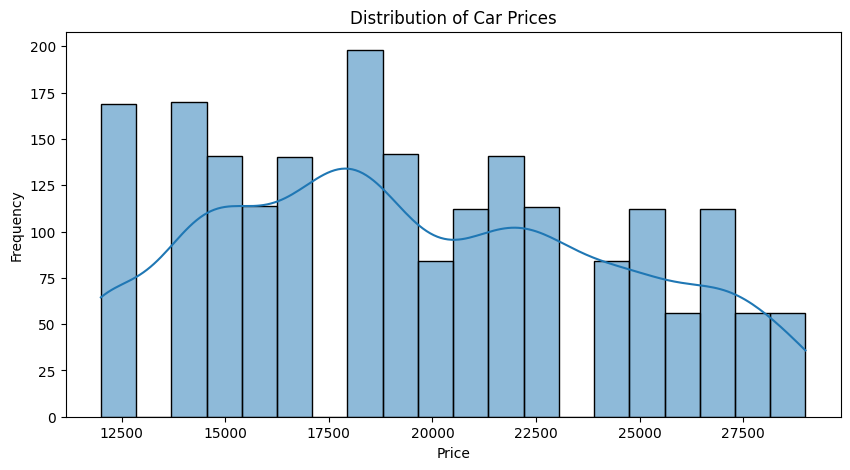

In [29]:
# Histogram of Car Prices
plt.figure(figsize=(10, 5)) # Adjust figure size for better display
sns.histplot(df['Price'], bins=20, kde=True) # Add kde for smoother distribution visualization
plt.title('Distribution of Car Prices') # Always good practice to use titles in your plots
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
# Interpretation: Shows the distribution of car prices. Is it skewed? Are there outliers?

# **Interpretation of the Distribution of Car Prices Histogram**

**Central Tendency**: The peak of the histogram appears to be around
18
,
000
−
18,000−
19,000, suggesting that this is the most common price range for cars in the dataset. This corresponds to the mode of the distribution. The distribution looks somewhat bimodal, with a smaller peak around
22
,
000
−
22,000−
23,000.

**Spread/Dispersion**: The price range spans approximately from $12,000 to $29,000. This gives us an idea of the overall price variability in the dataset. The x-axis shows the price bins, and the height of the bar represents how many cars fall into that price range.

**Shape of the Distribution**: The distribution is not perfectly symmetrical. It appears to be slightly right-skewed, meaning there's a longer tail of higher prices. This suggests that there are more cars at the lower end of the price spectrum and fewer very expensive cars. The KDE plot (the curved line) makes this skewness easier to visualize. The frequencies generally decrease as the price increases.

**Potential Outliers**: While there are higher priced cars above roughly $25,000, based on this visualization, there are no clear, extreme outliers. This can also be interpreted in the context of the box plot (if you generated one), which more explicitly identifies outliers.

**Granularity**: The histogram uses bins of a certain width (determined by Seaborn or how you set it up in Matplotlib). The bin width can affect the appearance of the distribution. If the bins were much wider, you would lose some of the detail in the shape of the distribution. If they were narrower, you'd see more fine-grained variations, which could be noise.

### **In summary**:

The histogram shows that car prices in the dataset are centered around the $18,000 - $19,000 range, range from around $12,000 to $29,000, and are slightly skewed toward the higher end. There don't appear to be extreme price outliers based on the visualization. This kind of price distribution is fairly typical for used car datasets, where a majority of vehicles fall within a "mid-range" pricing category, with some cheaper and more expensive options at either tail.



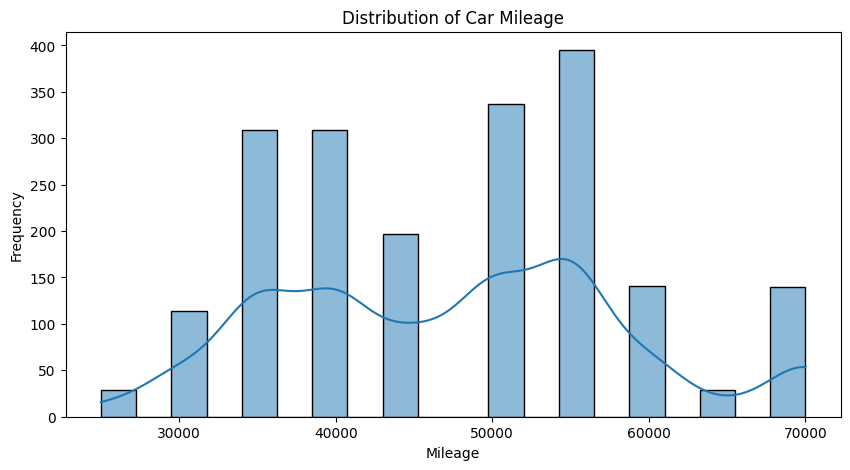

In [31]:
# Histogram of Car Mileage
plt.figure(figsize=(10, 5))
sns.histplot(df['Mileage'], bins=20, kde=True)
plt.title('Distribution of Car Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()
# Interpretation:  Shows mileage distribution.  Similar questions as price: Skewness? Outliers?

# **Interpretation of the Distribution of Car Mileage Histogram**

**Multimodal Distribution**: The histogram exhibits a multimodal distribution, meaning it has multiple peaks. There are prominent peaks around 35,000, 40,000, 50,000, and 55,000 miles. This pattern may suggest distinct groups or categories of cars based on their usage (e.g., low-mileage, average-mileage, high-mileage). It would be worthwhile investigating further if these peaks correlate with factors like car age, brand, model, or price.

**Spread/Range**: The mileage values span from approximately 25,000 miles to 70,000 miles, indicating the range of car usage represented in the dataset. Remember: The x-axis represents mileage, and the y-axis (Frequency) is the count of cars in a given bin.

**Frequency Concentrations**: The highest frequency of cars falls within the 35,000 to 60,000 mileage range. The peaks in this region indicate these are the most common mileage values. The counts for cars between 25,000 and 30,000, as well as 60,000 and 70,000, are relatively lower.

**Data Collection**: The multimodal nature might reflect how the data was collected. For instance, people selling used cars often round mileages to the nearest 5,000, or dealers could have mileage brackets they use. This can lead to artificial peaks at these rounded numbers.

**No Clear Outliers**: There aren't any apparent outliers in this distribution. There are no extremely low or extremely high mileage values that are significantly separated from the rest of the data. The KDE plot confirms that while there's more variation in the middle, there are no extreme deviations.

### **In Summary**:

The car mileage histogram displays a multimodal distribution with peaks at various mileage ranges, especially between 35,000 and 55,000 miles. Most car mileages in the dataset fall within the 35,000 to 60,000 mile range. No outliers are immediately apparent. The multiple peaks might be due to data collection practices or underlying subgroups of car usage patterns. Analyzing these mileage patterns in conjunction with other car features would provide a more complete understanding of their significance.

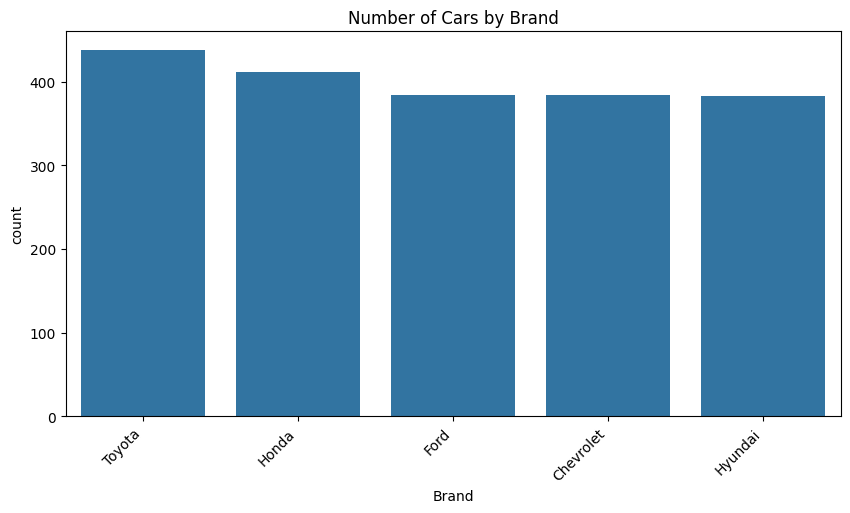

In [32]:
# Categorical Variable Analysis (Bar Charts)
plt.figure(figsize=(10, 5))
sns.countplot(x='Brand', data=df, order=df['Brand'].value_counts().index)  # Order by frequency
plt.title('Number of Cars by Brand')
plt.xticks(rotation=45, ha='right')
plt.show()

# **Bar Chart of Number of Cars by Brand**



**1**.   **Brand Representation**: The chart includes five car brands: Toyota, Honda, Ford,

**2**.   **Frequency Comparison**:



*   Toyota is the most frequent brand in the dataset, with the highest number of cars.


*   Honda follows closely behind Toyota.

* Ford, Chevrolet, and Hyundai have approximately similar counts which are slightly less than Toyota and Honda.

**3**. **Balanced Dataset (Relatively)**:

The dataset appears to be relatively balanced in terms of brand representation. While Toyota has the most entries, the difference between Toyota/Honda and the other brands is not excessive. This relatively even distribution can be beneficial for certain types of analysis (like comparing brands), although you'd still want to consider the absolute number of vehicles from each manufacturer to make sure it's statistically significant.

**4**. **Market Insights (Potential):**

This bar chart might reflect market share or popularity of these brands in the region or time period from which the data was collected. However, without additional context (location data, time of data collection), it's difficult to draw definitive conclusions about market share.


# **3. Data Analysis and Insights**



In [34]:
# Price Analysis
avg_price_by_brand = df.groupby('Brand')['Price'].mean()
print(avg_price_by_brand) # Interpretation:  Provides the average price for each car brand.  Which brands are most/least expensive on average?

Brand
Chevrolet    19679.687500
Ford         19567.708333
Honda        19635.036496
Hyundai      19629.242820
Toyota       19522.831050
Name: Price, dtype: float64


In [35]:
top_5_expensive = df.nlargest(5, 'Price')  # Much more efficient than sorting
print(top_5_expensive)
# Interpretation:  Lists the 5 most expensive cars in the dataset.

     Car ID    Brand     Model  Year   Color  Mileage  Price       Location
24       25  Hyundai  Palisade  2019  Silver    30000  29000  San Francisco
64       65  Hyundai  Palisade  2019  Silver    30000  29000  San Francisco
95       96     Ford      Edge  2019    Blue    30000  29000        Chicago
135     136     Ford      Edge  2019    Blue    30000  29000        Chicago
166     167   Toyota   4Runner  2019  Silver    30000  29000    Los Angeles


In [36]:
price_trend = df.groupby('Year')['Price'].mean()
print(price_trend)
# Interpretation:  Shows the trend of average prices over the years. Increasing, decreasing, or stable?

Year
2015    19880.116959
2016    19610.951009
2017    19252.941176
2018    19883.280757
2019    19849.557522
2020    19136.507937
Name: Price, dtype: float64


In [37]:
# Mileage Analysis (similar to price analysis)
avg_mileage_by_brand = df.groupby('Brand')['Mileage'].mean()
print(avg_mileage_by_brand)

Brand
Chevrolet    47252.604167
Ford         47421.875000
Honda        47262.773723
Hyundai      47624.020888
Toyota       47682.648402
Name: Mileage, dtype: float64


In [38]:
# Location Analysis
popular_brands_by_location = df.groupby('Location')['Brand'].agg(lambda x: x.value_counts().index[0]) # Most frequent
print(popular_brands_by_location)
# Interpretation: Shows the most frequent brand in each city. Which brands are dominant in different markets?

Location
Atlanta              Honda
Chicago               Ford
Dallas              Toyota
Houston          Chevrolet
Los Angeles         Toyota
Miami            Chevrolet
New York             Honda
Phoenix               Ford
San Francisco      Hyundai
Seattle            Hyundai
Name: Brand, dtype: object


In [39]:
# Correlation Analysis
correlation = df['Mileage'].corr(df['Price'])
print(f"Correlation between Mileage and Price: {correlation}")

Correlation between Mileage and Price: -0.25845961843278625


# **Interpretation of the Correlation Analysis**

**Negative relationship**: As mileage increases, the price of the car tends to decrease. This makes intuitive sense – cars with more miles on them are generally considered to have more wear and tear and are thus less valuable.

**Moderate correlation**: The relationship isn't very strong. While there's a general trend of higher mileage corresponding to lower prices, there's also a lot of variability. This means that mileage alone doesn't perfectly predict the price of a car. Other factors like make, model, condition, and age also play a significant role.

# 4. **Data Visualization**

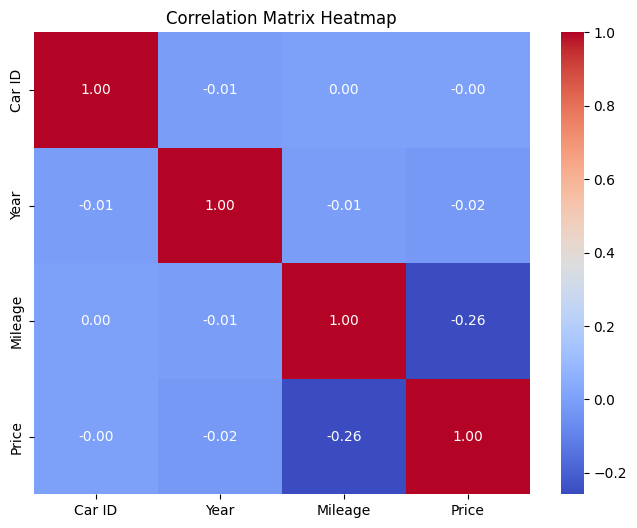

In [41]:
# Heatmap for Correlation
import numpy as np
numeric_df = df.select_dtypes(include=np.number) # Important: Only include numerical columns
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # annot=True shows values, fmt=".2f" rounds
plt.title('Correlation Matrix Heatmap')
plt.show()
# Interpretation: Visual representation of correlations between numerical variables. Darker red indicates strong positive correlation, darker blue
# indicates strong negative correlation.

# **Correlation Matrix Heatmap**

**1. Variables**: The heatmap includes 'Car ID', 'Year', 'Mileage', and 'Price'. Each variable is represented on both the x and y axes.

**2. Correlation Coefficient**: Each cell in the heatmap represents the correlation coefficient between the corresponding row and column variables. The correlation coefficient ranges from -1 to +1:

* +1: Perfect positive correlation (as one variable increases, the other increases proportionally).

* -1: Perfect negative correlation (as one variable increases, the other decreases proportionally).

* 0: No linear correlation (the variables don't have a linear relationship).

**3. Color Intensity and Scale**: The color intensity represents the strength of the correlation. The color bar on the right provides the scale. In this case, it appears:

* Dark red represents strong positive correlation (closer to +1).

* Dark blue represents strong negative correlation (closer to -1).

* Lighter shades indicate weaker correlations (closer to 0).

**4. Diagonal**: The diagonal of the heatmap always shows a perfect positive correlation (+1) because each variable is perfectly correlated with itself.

**Key Interpretations**:

* **Mileage and Price**: There's a moderate negative correlation (-0.26) between mileage and price. This suggests that, in general, cars with higher mileage tend to have lower prices, which is a typical relationship in the used car market.

* **Year and Price**: There is a very slight negative correlation (-0.02) between year and price. This is weak and suggests that the year of the car is not a strong predictor of price in my current dataset. (This might be surprising, and it's important to investigate why this might be the case. Are there other factors dominating price? Is the range of years relatively narrow?).

* **Year and Mileage**: A weak negative correlation (-0.01) exists between 'Year' and 'Mileage'. Older cars tend to have slightly higher mileage, but the relationship is very weak.






# **5. Advanced Analysis**

In [47]:
# Label Encoding for Categorical Features (essential for regression and clustering)
import sklearn
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Import LinearRegression
from sklearn.linear_model import LinearRegression
label_encoder = LabelEncoder()
# Import train_test_split
from sklearn.model_selection import train_test_split
label_encoder = LabelEncoder()
# Import mean_squared_error and r2_score
from sklearn.metrics import mean_squared_error, r2_score # This line is added
for col in ['Brand', 'Model', 'Color', 'Location']: # All my object/categorical columns
    df[col] = label_encoder.fit_transform(df[col])

# Linear Regression
X = df.drop('Price', axis=1)  # Features (all columns except 'Price')
y = df['Price']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 20062390.552880287
R-squared: 0.0442131289920783


# **Regression Analysis Interpretation**

**Mean Squared Error (MSE)**:

The MSE represents the average squared difference between my model's predicted car prices (y_pred) and the actual car prices (y_test) in my test dataset. A lower MSE indicates better model performance, meaning the predictions are closer to the actual values. An MSE of over 20 million is quite high and indicates that this model's predictions are, on average, quite far from the true prices.

**R-squared:**

The R-squared value (coefficient of determination) measures the proportion of the variance in the target variable ('Price') that is explained by my model's features. It ranges from 0 to 1.

* An R-squared of 1 indicates that the model perfectly explains all the variability in the 'Price'.

* An R-squared of 0 means that the model does not explain any of the variability.

* The R-squared value of 0.044 is very low. This means that my model only explains about 4.4% of the variation in car prices. The remaining 95.6% of the price variability is not captured by the current model.

A low R-squared and a high MSE indicate that my linear regression model is not performing well in predicting car prices. There are several reasons why this might be the case:

* **1. Non-Linear Relationships**: A linear regression model assumes a linear relationship between the features and the target variable. If the relationships in the data are non-linear, the model won't be able to capture them effectively.

* **2. Missing Important Features**: The model's poor performance could be because it's missing essential predictive features. Factors like car condition, specific model trim levels, optional features, or market demand are not in the current dataset and might be much better predictors of price.

* **Insufficient Data**: While I have a decent number of rows, more data can often improve the model performance, especially if I want to capture complex interactions between features.

